In [2]:
#공공데이터 포털에 있는 시군구별&월별 교통사고 데이터를 사용하여 시군구와 월별로 사고건수 패턴을 분석하였습니다.
import pandas as pd
import seaborn as sns

In [3]:
#한글 파일을 불러오기 위해서 encoding='cp949'를 사용하여 파일을 불러왔습니다.
df = pd.read_csv("도로교통공단_시군구별 월별 교통사고 통계_20221231.csv", encoding='cp949')

#데이터에 헤드(상위 6개) 부분만을 보여주어 데이터를 잘 불러왔는지 확인했습니다.
df.head()

,시도,시군구,발생월,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,서울,종로구,1,65,0,15,61,13
1,서울,종로구,2,59,0,15,68,4
2,서울,종로구,3,70,0,19,60,9
3,서울,종로구,4,90,0,21,102,10
4,서울,종로구,5,88,1,20,98,12


In [4]:
#데이터 파일의 정보를 출력합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      2741 non-null   object
 1   시군구     2741 non-null   object
 2   발생월     2741 non-null   int64 
 3   사고건수    2741 non-null   int64 
 4   사망자수    2741 non-null   int64 
 5   중상자수    2741 non-null   int64 
 6   경상자수    2741 non-null   int64 
 7   부상신고자수  2741 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 171.4+ KB


In [5]:
#결측치 확인 : null()을 호출하고 합계가 0인지 확인하여 null 값을 다시 확인합니다.
df.isnull().sum()

시도        0
시군구       0
발생월       0
사고건수      0
사망자수      0
중상자수      0
경상자수      0
부상신고자수    0
dtype: int64

In [6]:
#K-means 클러스터링을 수행하기 위해서 문자열로 되어있는 '시군구' 열을 수치형 데이터로 변환합니다.
from sklearn.preprocessing import LabelEncoder

# '시군구' 열을 수치형으로 변환하기 위한 식을 작성합니다.
label_encoder = LabelEncoder()
df['시군구'] = label_encoder.fit_transform(df['시군구'])


Cluster labels: [0 0 0 ... 2 2 2]


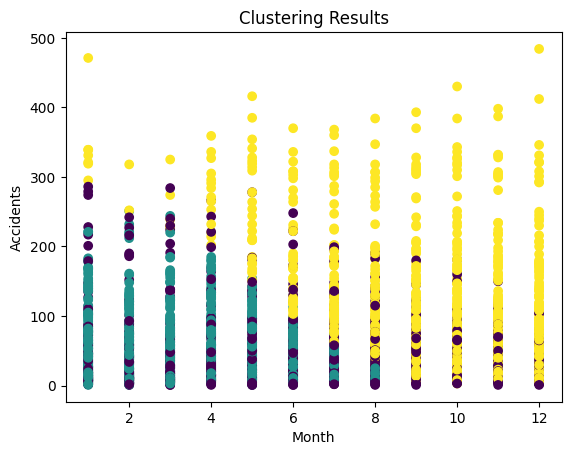

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


#  시군구, 발생월, 사고건수 열만 선택하여 정규화를 진행합니다.
select = df[['시군구', '발생월', '사고건수']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(select)

# K-means 클러스터링을 진행합니다.
kmeans = KMeans(n_clusters=3, random_state=42)  # 클러스터 수는 임의로 3으로 설정
kmeans.fit(scaled_data)
clusters = kmeans.labels_

# 클러스터링 결과를 확인하는 코드를 작성합니다.
print("Cluster labels:", clusters)

# 클러스터링 결과를 시각화합니다.
plt.scatter(select['발생월'], select['사고건수'], c=clusters, cmap='viridis')
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.title('Clustering Results')
plt.show()


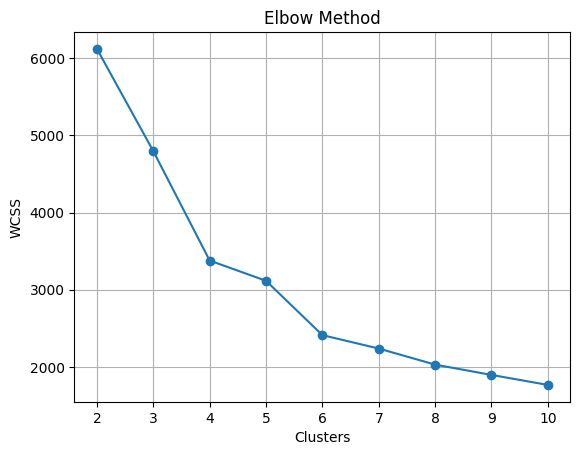

In [8]:
import numpy as np

# 시군구, 발생월, 사고건수 열만 선택하여 정규화를 진행합니다.
select = df[['시군구', '발생월', '사고건수']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(select)

# 클러스터 수 범위 지정하기 위해 변수를 입력합니다.
min_clusters = 2
max_clusters = 10

# 클러스터링을 실행하고 WCSS 계산하기 위한 식을 작성합니다.
wcss = []
for i in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# 클러스터 수에 따른 WCSS 그래프 그리기를 위한 식을 작성합니다.
plt.plot(range(min_clusters, max_clusters+1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(min_clusters, max_clusters+1, step=1))
plt.grid(True)
plt.show()


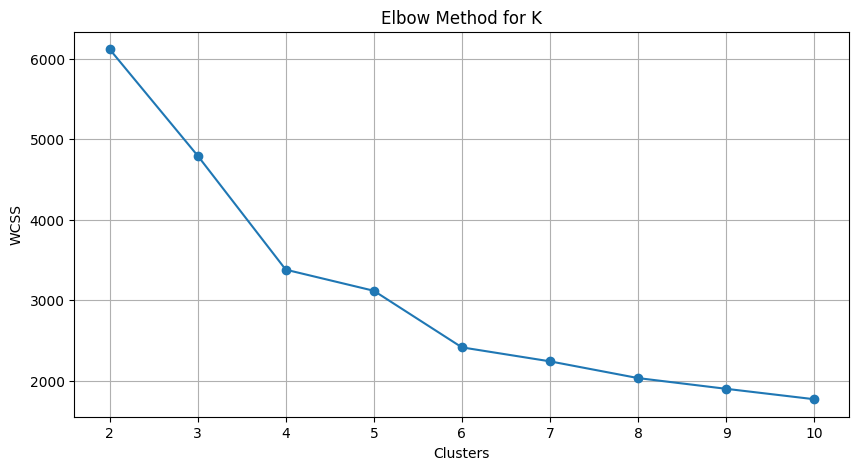

Cluster labels: [0 0 0 ... 2 2 2]


In [9]:

# 시군구, 발생월, 사고건수 열만 선택하여 정규화를 진행합니다.
select = df[['시군구', '발생월', '사고건수']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(select)

# 클러스터 수 범위를 2,10으로 지정합니다.
min_clusters = 2
max_clusters = 10

# 클러스터링 실행 및 WCSS 계산합니다.
wcss = []
for i in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# 클러스터 수에 따른 WCSS 그래프 그리기를 다시 한 번 그립니다.
plt.figure(figsize=(10, 5))
plt.plot(range(min_clusters, max_clusters+1), wcss, marker='o')
plt.title('Elbow Method for K')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(min_clusters, max_clusters+1, step=1))
plt.grid(True)
plt.show()

# 최적의 클러스터 수 K를 선택합니다.
k = 3  

# 최적의 클러스터 수로 K-means 클러스터링 실행합니다.
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 클러스터링 결과를 확인합니다.
print("Cluster labels:", clusters)


In [10]:
#각 클러스터의 중심점을 분석하고, 중심점을 바탕으로 각 클러스터의 특성을 설명하는 부분입니다.
# 각 클러스터의 중심점 출력합니다.
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)

# 각 클러스터의 특성을 설명하는 코드입니다.
for i, center in enumerate(cluster_centers):
    print(f"\nCluster {i+1}의 특성:")
    for j, feature_value in enumerate(center):
        print(f"특성 {select.columns[j]}: {feature_value}")


Cluster Centers:
[[ 1.04038207  0.00535701 -0.36059822]
 [-0.70070397 -0.82306789 -0.23603142]
 [-0.48307503  0.81791119  0.64687983]]

Cluster 1의 특성:
특성 시군구: 1.0403820699589181
특성 발생월: 0.005357009156683476
특성 사고건수: -0.3605982209506502

Cluster 2의 특성:
특성 시군구: -0.7007039739177141
특성 발생월: -0.8230678928621651
특성 사고건수: -0.23603142369285968

Cluster 3의 특성:
특성 시군구: -0.4830750336026171
특성 발생월: 0.8179111927374505
특성 사고건수: 0.6468798349742333


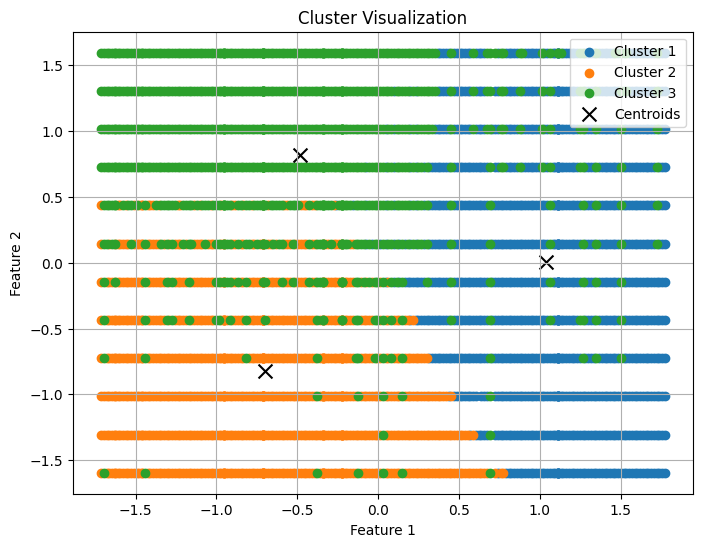

In [11]:
#클러스터를 시각화하여 각 클러스터가 어떻게 구성되어 있는지 보여주는 산점도 부분입니다.
plt.figure(figsize=(8, 6))

# 각 클러스터를 산점도로 표시합니다.
for cluster_label in range(k):
    cluster_data = scaled_data[clusters == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label + 1}')

# 클러스터 중심점을 표시합니다.
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', s=100, label='Centroids')

plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
from sklearn.metrics import silhouette_score

# 실루엣 점수 계산
silhouette_avg = silhouette_score(scaled_data, clusters)

print("전체 데이터의 평균 실루엣 점수:", silhouette_avg)

전체 데이터의 평균 실루엣 점수: 0.2739020318180928
